In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]


#Import Libraries dan DataSet

Import Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from google.colab import drive

Import Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/smmh.csv')
df = pd.DataFrame(data)
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


#Pre-Processing

In [4]:
#menampilkan info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [5]:
#display all columns
pd.set_option("display.max_columns", None)

In [6]:
df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


In [7]:
#rename Column
df.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Relationship_Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social_Media_User',
                       '7. What social media platforms do you commonly use?':'Platforms_Used',
                       '8. What is the average time you spend on social media every day?':'Time_Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'Purposeless_use_of_Social_Media',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'Distracted_by_Social_Media',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Restlessness_if_Social_Media_not_used ',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'Ease_of_Distraction_by_Social_Media',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Bothered_by_worries',
                       '14. Do you find it difficult to concentrate on things?':'Difficulty_in_concentrating',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Comparison_of_self_to_peers',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Feelings_about_above_comparison',
                       '17. How often do you look to seek validation from features of social media?':'Validation_sought_from_Social_Media',
                       '18. How often do you feel depressed or down?':'Feelings_of_Depression',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Fluctuation_of_interest',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleep_Issues' },inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Timestamp                               481 non-null    object 
 1   Age                                     481 non-null    float64
 2   Sex                                     481 non-null    object 
 3   Relationship_Status                     481 non-null    object 
 4   Occupation                              481 non-null    object 
 5   Affiliations                            451 non-null    object 
 6   Social_Media_User                       481 non-null    object 
 7   Platforms_Used                          481 non-null    object 
 8   Time_Spent                              481 non-null    object 
 9   Purposeless_use_of_Social_Media         481 non-null    int64  
 10  Distracted_by_Social_Media              481 non-null    int64 

In [9]:
df

,Timestamp,Age,Sex,Relationship_Status,Occupation,Affiliations,Social_Media_User,Platforms_Used,Time_Spent,Purposeless_use_of_Social_Media,Distracted_by_Social_Media,Restlessness_if_Social_Media_not_used,Ease_of_Distraction_by_Social_Media,Bothered_by_worries,Difficulty_in_concentrating,Comparison_of_self_to_peers,Feelings_about_above_comparison,Validation_sought_from_Social_Media,Feelings_of_Depression,Fluctuation_of_interest,Sleep_Issues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


**Convert Sex, Age, Time_Spent, Social Media User**

Gender

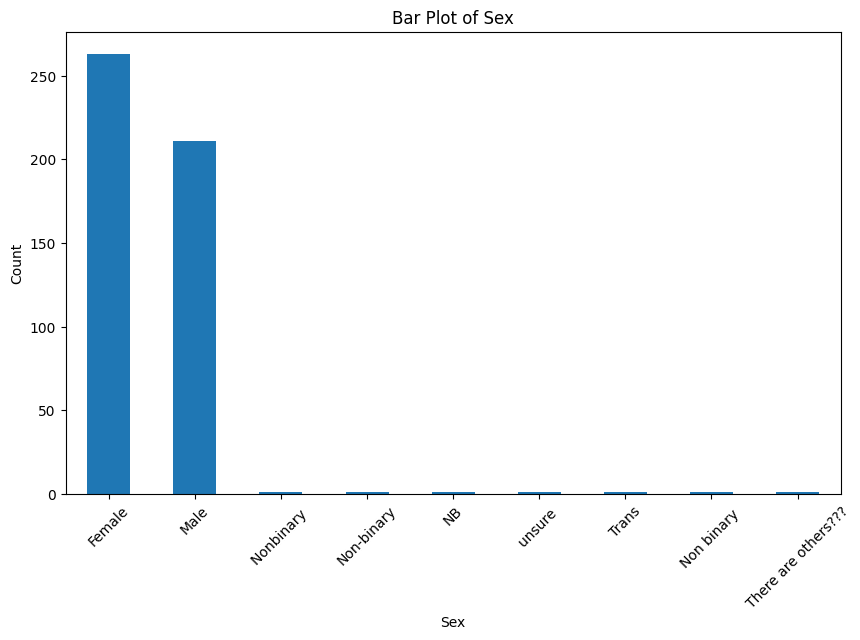

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
kategori_counts = df['Sex'].value_counts()
plt.figure(figsize=(10, 6))
kategori_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar Plot of Sex')
plt.show()

In [11]:
#List all the unique Gender/Sex entries.
Genders = set(df['Sex'])
print(Genders)

{'NB', 'Male', 'There are others???', 'unsure ', 'Trans', 'Non-binary', 'Non binary ', 'Nonbinary ', 'Female'}


In [12]:
# df.drop(df.loc[df['Sex'] =='There are others???'].index, inplace=True)

In [13]:
# Genders = set(df['Sex'])
# print(Genders)

In [14]:
#Combining the unique entries that all fall under the "Others" categorysure ', 'There are others???', 'Female'}

df.replace('Non-binary','Others', inplace=True)
df.replace('Nonbinary ','Others', inplace=True)
df.replace('NB','Others', inplace=True)
df.replace('unsure ','Others', inplace=True)
df.replace('Non binary ','Others', inplace=True)
df.replace('Trans','Others', inplace=True)
df.replace('There are others???','Others', inplace=True)

In [15]:
#setting Male to 0, Female to 1, and Others to 2.
df.loc[df['Sex'] == 'Male', 'Sex'] = 0
df.loc[df['Sex'] == 'Female', 'Sex'] = 1
df.loc[df['Sex'] == 'Others', 'Sex'] = 2
df['Sex'] = df['Sex'].astype('int64')

In [16]:
Genders = set(df['Sex'])
print(Genders)

{0, 1, 2}


In [17]:
display(df['Sex'].to_string())

'0      0\n1      1\n2      1\n3      1\n4      1\n5      1\n6      1\n7      1\n8      1\n9      0\n10     0\n11     1\n12     1\n13     1\n14     0\n15     0\n16     0\n17     0\n18     0\n19     0\n20     0\n21     0\n22     1\n23     1\n24     0\n25     1\n26     0\n27     0\n28     1\n29     1\n30     1\n31     0\n32     0\n33     1\n34     1\n35     2\n36     0\n37     0\n38     1\n39     0\n40     1\n41     1\n42     1\n43     1\n44     0\n45     1\n46     0\n47     1\n48     0\n49     1\n50     1\n51     0\n52     0\n53     0\n54     0\n55     0\n56     0\n57     1\n58     1\n59     1\n60     1\n61     1\n62     1\n63     0\n64     1\n65     0\n66     0\n67     2\n68     0\n69     0\n70     0\n71     0\n72     1\n73     0\n74     1\n75     0\n76     0\n77     1\n78     1\n79     0\n80     0\n81     0\n82     0\n83     1\n84     0\n85     2\n86     1\n87     1\n88     0\n89     1\n90     0\n91     1\n92     1\n93     2\n94     1\n95     0\n96     0\n97     0\n98     1\n99     0\

Age

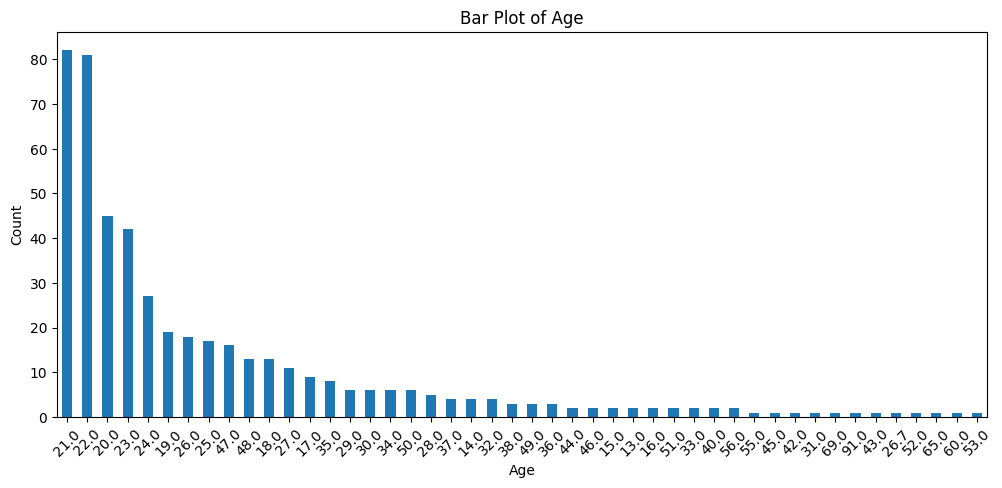

In [18]:
import seaborn as sns
kategori_counts = df['Age'].value_counts()
plt.figure(figsize=(12, 5))
kategori_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of Age')
plt.show()

In [19]:
df['Age'] = df['Age'].astype(int)
print(df)

               Timestamp  Age  Sex Relationship_Status          Occupation  \
0     4/18/2022 19:18:47   21    0   In a relationship  University Student   
1     4/18/2022 19:19:28   21    1              Single  University Student   
2     4/18/2022 19:25:59   21    1              Single  University Student   
3     4/18/2022 19:29:43   21    1              Single  University Student   
4     4/18/2022 19:33:31   21    1              Single  University Student   
..                   ...  ...  ...                 ...                 ...   
476   5/21/2022 23:38:28   24    0              Single     Salaried Worker   
477    5/22/2022 0:01:05   26    1             Married     Salaried Worker   
478   5/22/2022 10:29:21   29    1             Married     Salaried Worker   
479   7/14/2022 19:33:47   21    0              Single  University Student   
480  11/12/2022 13:16:50   53    0             Married     Salaried Worker   

            Affiliations Social_Media_User  \
0             Uni

Time Spent

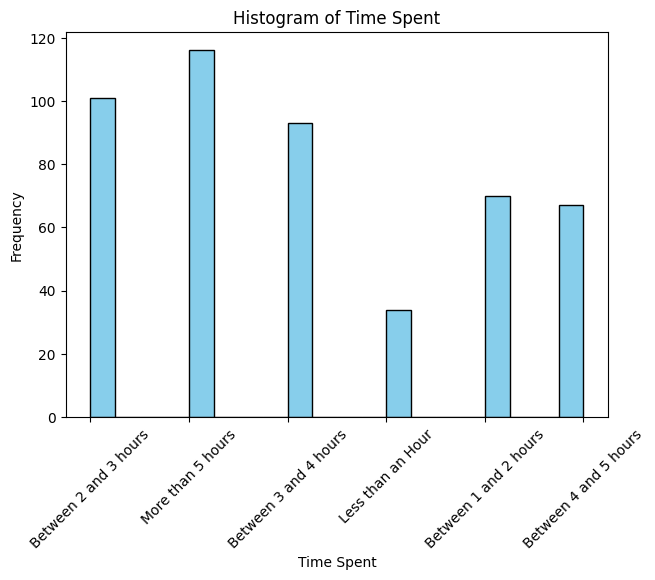

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.hist(df['Time_Spent'], bins=20, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Time Spent')
plt.ylabel('Frequency')
plt.title('Histogram of Time Spent')
plt.show()

In [21]:
#converting time spent object
df.loc[df['Time_Spent'] == 'Less than an Hour', 'Time_Spent'] = 0
df.loc[df['Time_Spent'] == 'Between 1 and 2 hours', 'Time_Spent'] = 1
df.loc[df['Time_Spent'] == 'Between 2 and 3 hours', 'Time_Spent'] = 2
df.loc[df['Time_Spent'] == 'Between 3 and 4 hours', 'Time_Spent'] = 3
df.loc[df['Time_Spent'] == 'Between 4 and 5 hours', 'Time_Spent'] = 4
df.loc[df['Time_Spent'] == 'More than 5 hours', 'Time_Spent'] = 5

In [22]:
#Converting Time Spent from object type to int64.
df['Time_Spent'] = df['Time_Spent'].astype('int64')

In [23]:
display(df['Time_Spent'].to_string())

'0      2\n1      5\n2      3\n3      5\n4      2\n5      2\n6      3\n7      5\n8      5\n9      0\n10     2\n11     3\n12     3\n13     3\n14     5\n15     1\n16     0\n17     4\n18     1\n19     1\n20     2\n21     5\n22     3\n23     1\n24     3\n25     3\n26     3\n27     2\n28     4\n29     3\n30     3\n31     2\n32     2\n33     2\n34     3\n35     5\n36     3\n37     0\n38     3\n39     2\n40     1\n41     3\n42     1\n43     5\n44     5\n45     5\n46     3\n47     3\n48     2\n49     3\n50     3\n51     5\n52     0\n53     1\n54     1\n55     5\n56     5\n57     2\n58     2\n59     1\n60     5\n61     1\n62     5\n63     1\n64     2\n65     1\n66     3\n67     2\n68     1\n69     3\n70     3\n71     2\n72     5\n73     1\n74     4\n75     0\n76     2\n77     3\n78     3\n79     3\n80     2\n81     5\n82     5\n83     4\n84     2\n85     2\n86     1\n87     1\n88     2\n89     2\n90     2\n91     3\n92     5\n93     4\n94     4\n95     5\n96     4\n97     5\n98     5\n99     4\

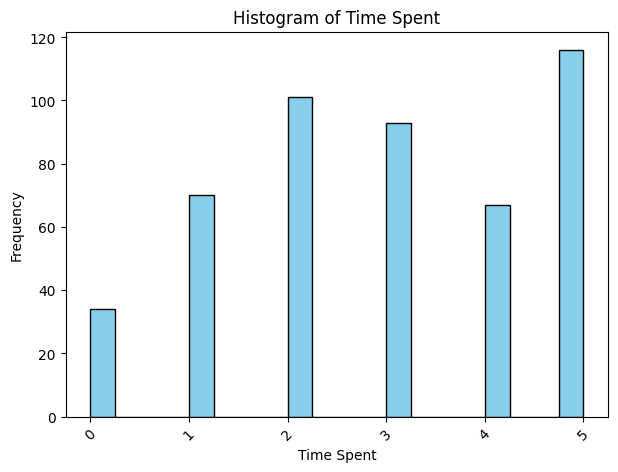

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.hist(df['Time_Spent'], bins=20, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Time Spent')
plt.ylabel('Frequency')
plt.title('Histogram of Time Spent')
plt.show()

Social Media User

Drop Timestamp

In [25]:
df.drop('Timestamp',axis=1, inplace=True)

#Encoding Data

In [26]:
#label encoding
from sklearn.preprocessing import LabelEncoder

# Daftar kolom yang akan di-label encoding
columns_to_encode = ['Relationship_Status','Occupation','Affiliations','Platforms_Used','Social_Media_User']

# Menerapkan Label Encoding pada setiap kolom
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Menampilkan hasil encoding
print(df.head())


   Age  Sex  Relationship_Status  Occupation  Affiliations  Social_Media_User  \
0   21    0                    1           3            10                  1   
1   21    1                    3           3            10                  1   
2   21    1                    3           3            10                  1   
3   21    1                    3           3            10                  1   
4   21    1                    3           3            10                  1   

   Platforms_Used  Time_Spent  Purposeless_use_of_Social_Media  \
0              48           2                                5   
1              48           5                                4   
2              20           3                                3   
3               5           5                                4   
4              13           2                                3   

   Distracted_by_Social_Media  Restlessness_if_Social_Media_not_used   \
0                           3              

In [27]:
df


,Age,Sex,Relationship_Status,Occupation,Affiliations,Social_Media_User,Platforms_Used,Time_Spent,Purposeless_use_of_Social_Media,Distracted_by_Social_Media,Restlessness_if_Social_Media_not_used,Ease_of_Distraction_by_Social_Media,Bothered_by_worries,Difficulty_in_concentrating,Comparison_of_self_to_peers,Feelings_about_above_comparison,Validation_sought_from_Social_Media,Feelings_of_Depression,Fluctuation_of_interest,Sleep_Issues
0,21,0,1,3,10,1,48,2,5,3,2,5,2,5,2,3,2,5,4,5
1,21,1,3,3,10,1,48,5,4,3,2,4,5,4,5,1,1,5,4,5
2,21,1,3,3,10,1,20,3,3,2,1,2,5,4,3,3,1,4,2,5
3,21,1,3,3,10,1,5,5,4,2,1,3,5,3,5,1,2,4,3,2
4,21,1,3,3,10,1,13,2,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24,0,3,1,17,1,13,2,3,4,3,4,3,4,4,2,4,3,4,4
477,26,1,2,1,10,1,74,1,2,1,2,3,4,4,4,2,4,4,4,1
478,29,1,2,1,10,1,74,2,3,3,4,3,2,3,3,3,4,2,2,2
479,21,0,3,3,10,1,46,2,2,3,2,3,3,2,2,3,4,4,5,4


HEATMAP CORRELATION

In [28]:
# # correlation of column
# import matplotlib.pyplot as plt
# plt.figure(figsize=(16,16))
# sns.heatmap(df.corr(),annot=True, cmap='inferno',mask=np.triu(df.corr(),k=1))

#Splitting Data 80%-20%

In [29]:
#Pisahkan variabel dependen (y) dan variabel independen (X)
X = df.drop('Purposeless_use_of_Social_Media', axis=1)
y = df['Purposeless_use_of_Social_Media']

In [30]:
# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest

**CV=5**

In [31]:
# Random Forest with RFECV
# Model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# RFECV untuk Random Forest
rfecv = RFECV(estimator=rf_model, step=1, cv=5)
X_train_rfecv = rfecv.fit_transform(X_train, y_train)
X_test_rfecv = rfecv.transform(X_test)

# menampilkan features yang dipilih
print('Num Features Before:', X_train.shape[1])
print('Num Features After:', X_train_rfecv.shape[1])
selected_features_rf = X.columns[rfecv.support_]
print("Selected Features (Random Forest):")
for feature in selected_features_rf:
    print(feature)


Num Features Before: 19
Num Features After: 19
Selected Features (Random Forest):
Age
Sex
Relationship_Status
Occupation
Affiliations
Social_Media_User
Platforms_Used
Time_Spent
Distracted_by_Social_Media
Restlessness_if_Social_Media_not_used 
Ease_of_Distraction_by_Social_Media
Bothered_by_worries
Difficulty_in_concentrating
Comparison_of_self_to_peers
Feelings_about_above_comparison
Validation_sought_from_Social_Media
Feelings_of_Depression
Fluctuation_of_interest
Sleep_Issues


In [32]:
# Train Random Forest model
rf_model.fit(X_train_rfecv, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Melakukan prediksi menggunakan Random Forest
rf_predictions = rf_model.predict(X_test_rfecv)
print("Hasil Prediksi dari Random Forest Regressor:")
print(rf_predictions)

Hasil Prediksi dari Random Forest Regressor:
[2.46 4.3  4.04 3.39 3.66 3.97 2.99 3.6  3.8  2.44 1.43 4.08 3.79 3.47
 3.79 3.73 4.39 3.21 3.15 4.01 3.48 3.23 3.52 3.17 3.16 3.92 4.5  3.62
 4.11 3.99 4.77 3.76 3.89 3.64 3.66 4.09 4.67 3.52 3.45 3.41 4.12 3.16
 4.18 3.94 4.08 3.85 1.19 4.02 3.44 3.31 3.88 2.98 3.88 3.71 4.21 3.25
 4.04 3.53 2.54 3.32 3.64 3.06 4.   3.03 4.5  3.2  2.78 3.09 3.48 3.42
 4.15 4.14 2.77 3.72 2.34 3.38 2.7  3.62 3.54 2.44 3.7  3.6  2.74 4.06
 3.31 3.88 3.8  3.6  3.57 2.   3.89 3.34 3.98 3.7  3.09 3.27 3.28]


**CV=15**

In [34]:
# Random Forest with RFECV
# Model Random Forest
rf_model_1 = RandomForestRegressor(n_estimators=100, random_state=42)

# RFECV untuk Random Forest
rfecv_RF = RFECV(estimator=rf_model_1, step=1, cv=15)
X_train_rfecv_RF = rfecv_RF.fit_transform(X_train, y_train)
X_test_rfecv_RF = rfecv_RF.transform(X_test)

# menampilkan features yang dipilih
print('Num Features Before:', X_train.shape[1])
print('Num Features After:', X_train_rfecv_RF.shape[1])
selected_features_rf = X.columns[rfecv_RF.support_]
print("Selected Features (Random Forest):")
for feature in selected_features_rf:
    print(feature)


Num Features Before: 19
Num Features After: 9
Selected Features (Random Forest):
Age
Affiliations
Platforms_Used
Time_Spent
Distracted_by_Social_Media
Restlessness_if_Social_Media_not_used 
Bothered_by_worries
Fluctuation_of_interest
Sleep_Issues


In [35]:
# Train Random Forest model
rf_model_1.fit(X_train_rfecv_RF, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Melakukan prediksi menggunakan Random Forest
rf_predictions_1 = rf_model_1.predict(X_test_rfecv_RF)
print("Hasil Prediksi dari Random Forest Regressor:")
print(rf_predictions_1)

Hasil Prediksi dari Random Forest Regressor:
[2.46 4.35 3.67 3.   3.62 4.09 3.08 3.57 3.87 2.66 1.33 4.13 3.8  3.51
 3.34 3.82 4.21 3.45 3.26 3.74 3.38 3.18 3.32 3.17 3.31 3.88 4.58 3.74
 4.   3.52 4.85 3.56 4.09 3.64 3.63 4.14 4.71 3.72 3.34 3.43 4.3  3.21
 4.11 3.65 4.35 3.77 1.25 3.58 3.49 3.39 3.74 2.95 4.13 3.54 4.35 3.38
 4.09 3.72 2.55 3.52 3.43 3.17 4.08 3.04 4.59 3.27 2.76 2.92 3.65 3.51
 4.04 4.19 3.1  3.64 2.31 3.33 2.79 3.74 3.4  2.29 3.87 3.83 2.76 4.
 3.3  3.34 3.83 3.58 3.62 1.92 3.6  3.21 4.05 3.74 3.33 3.3  3.24]


#Multiple Linear Regression

**CV=5**

In [37]:
# Multiple Linear Regression with RFECV
lr_model = LinearRegression()

#
rfecv_lr = RFECV(estimator=lr_model, step=1, cv=5)
X_train_rfecv_lr = rfecv_lr.fit_transform(X_train, y_train)
X_test_rfecv_lr = rfecv_lr.transform(X_test)

# Print features
print('Num Features Before:', X_train.shape[1])
print('Num Features After:', X_train_rfecv_lr.shape[1])

selected_features_lr = X.columns[rfecv_lr.support_]
print("Selected Features (Linear Regression):")
for feature in selected_features_lr:
    print(feature)

Num Features Before: 19
Num Features After: 4
Selected Features (Linear Regression):
Social_Media_User
Time_Spent
Distracted_by_Social_Media
Fluctuation_of_interest


In [38]:
# Train Linear Regression model
lr_model.fit(X_train_rfecv_lr, y_train)

LinearRegression()

In [39]:
#Prediksi dengan MLR
lr_predictions = lr_model.predict(X_test_rfecv_lr)

In [40]:
# Mendapatkan koefisien (slope) dan intersep (intercept)
coefficients = lr_model.coef_
intercept = lr_model.intercept_

# Menampilkan hasil persamaan linear
print("Persamaan linear:")
print("y =", end=" ")
for i, coef in enumerate(coefficients):
    print(f"{coef:.2f} * X{str(i+1)} +", end=" ")
print(f"{intercept:.2f}")
print("Intersep (b0):", intercept)

Persamaan linear:
y = -0.48 * X1 + 0.15 * X2 + 0.27 * X3 + 0.16 * X4 + 2.16
Intersep (b0): 2.163798634174648


**CV=15**

In [41]:
# Multiple Linear Regression with RFECV
lr_model_1 = LinearRegression()

#
rfecv_lr_1 = RFECV(estimator=lr_model_1, step=1, cv=15)
X_train_rfecv_lr_1 = rfecv_lr_1.fit_transform(X_train, y_train)
X_test_rfecv_lr_1 = rfecv_lr_1.transform(X_test)

# Print features
print('Num Features Before:', X_train.shape[1])
print('Num Features After:', X_train_rfecv_lr_1.shape[1])

selected_features_lr = X.columns[rfecv_lr_1.support_]
print("Selected Features (Linear Regression):")
for feature in selected_features_lr:
    print(feature)

Num Features Before: 19
Num Features After: 4
Selected Features (Linear Regression):
Social_Media_User
Time_Spent
Distracted_by_Social_Media
Fluctuation_of_interest


In [42]:
# Train Linear Regression model
lr_model_1.fit(X_train_rfecv_lr_1, y_train)

LinearRegression()

In [43]:
#Prediksi dengan MLR
lr_predictions_1 = lr_model_1.predict(X_test_rfecv_lr)

# Percobaan 60%-40%

In [44]:
# Split data menjadi data latih dan data uji
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.4, random_state=42)

**CV=5**

In [45]:
# Random Forest with RFECV
# Model Random Forest
rf_model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# RFECV untuk Random Forest
rfecv_1 = RFECV(estimator=rf_model_2, step=1, cv=5)
X_train_rfecv_1 = rfecv_1.fit_transform(X_train_1, y_train_1)
X_test_rfecv_1 = rfecv_1.transform(X_test_1)

# menampilkan features yang dipilih
print('Num Features Before:', X_train_1.shape[1])
print('Num Features After:', X_train_rfecv_1.shape[1])
selected_features_rf = X.columns[rfecv_1.support_]
print("Selected Features (Random Forest):")
for feature in selected_features_rf:
    print(feature)

Num Features Before: 19
Num Features After: 9
Selected Features (Random Forest):
Age
Affiliations
Platforms_Used
Time_Spent
Distracted_by_Social_Media
Restlessness_if_Social_Media_not_used 
Ease_of_Distraction_by_Social_Media
Fluctuation_of_interest
Sleep_Issues


In [46]:
# Train Random Forest model
rf_model_2.fit(X_train_rfecv_1, y_train_1)

RandomForestRegressor(random_state=42)

In [47]:
# Melakukan prediksi menggunakan Random Forest
rf_predictions_2 = rf_model_2.predict(X_test_rfecv_1)
print("Hasil Prediksi dari Random Forest Regressor:")
print(rf_predictions_2)

Hasil Prediksi dari Random Forest Regressor:
[2.6  4.42 3.68 3.14 3.61 3.59 3.12 3.59 3.66 2.89 1.45 4.11 3.44 3.49
 3.57 3.3  4.24 3.27 3.27 4.08 3.2  2.93 3.38 3.15 3.32 4.45 4.51 3.49
 4.06 4.09 4.68 4.   3.97 3.71 3.93 4.13 4.52 3.64 2.88 3.66 4.46 3.15
 4.06 3.72 4.39 3.73 1.32 4.05 3.76 3.51 3.73 2.63 4.04 4.03 4.27 3.47
 3.87 3.7  2.38 3.44 3.37 3.17 4.15 3.31 4.56 3.64 2.9  3.06 3.46 3.47
 3.77 4.29 3.2  3.32 2.4  3.33 2.56 3.84 3.27 2.36 4.26 3.53 2.41 3.86
 3.06 3.63 3.64 3.44 3.29 2.36 3.87 3.28 4.32 3.74 3.21 3.34 3.3  2.05
 3.38 3.5  4.06 4.06 3.59 4.65 3.04 4.1  3.04 4.05 1.9  3.4  2.69 3.49
 3.01 4.22 3.51 3.61 2.52 3.87 1.87 4.03 3.94 4.53 3.67 3.65 3.37 3.54
 3.43 3.44 3.21 2.33 4.04 3.68 2.99 3.15 4.77 4.37 3.2  3.91 4.49 3.89
 2.49 3.53 3.46 3.25 3.24 3.89 3.71 3.5  3.74 4.28 4.25 2.45 3.43 4.51
 3.57 3.43 3.1  2.97 4.13 4.88 4.1  3.72 4.59 4.28 3.23 4.68 4.07 3.61
 2.32 4.08 4.74 2.93 3.1  3.83 3.04 4.42 2.45 4.19 3.5  4.07 3.22 4.1
 3.39 3.94 3.85 4.79 3.05 2.99 3.

**CV=15**

In [48]:
# Random Forest with RFECV
# Model Random Forest
rf_model_3 = RandomForestRegressor(n_estimators=100, random_state=42)

# RFECV untuk Random Forest
rfecv_2 = RFECV(estimator=rf_model_3, step=1, cv=15)
X_train_rfecv_2 = rfecv_2.fit_transform(X_train_1, y_train_1)
X_test_rfecv_2 = rfecv_2.transform(X_test_1)

# menampilkan features yang dipilih
print('Num Features Before:', X_train_1.shape[1])
print('Num Features After:', X_train_rfecv_2.shape[1])
selected_features_rf = X.columns[rfecv_2.support_]
print("Selected Features (Random Forest):")
for feature in selected_features_rf:
    print(feature)

Num Features Before: 19
Num Features After: 7
Selected Features (Random Forest):
Age
Affiliations
Platforms_Used
Time_Spent
Distracted_by_Social_Media
Restlessness_if_Social_Media_not_used 
Fluctuation_of_interest


In [49]:
# Train Random Forest model
rf_model_3.fit(X_train_rfecv_2, y_train_1)

RandomForestRegressor(random_state=42)

In [50]:
# Melakukan prediksi menggunakan Random Forest
rf_predictions_3 = rf_model_3.predict(X_test_rfecv_2)
print("Hasil Prediksi dari Random Forest Regressor:")
print(rf_predictions_3)

Hasil Prediksi dari Random Forest Regressor:
[2.4  4.38 3.79 3.17 3.84 3.74 3.19 3.76 3.78 2.43 1.54 3.82 3.52 3.58
 3.73 3.15 4.27 3.34 3.21 4.01 3.32 3.04 3.44 3.24 3.36 4.24 4.83 3.43
 4.03 3.92 4.77 4.07 3.91 3.85 3.93 4.23 4.83 3.7  2.97 3.67 4.05 3.3
 4.47 3.71 4.45 3.8  1.47 4.29 4.04 3.5  3.73 2.64 4.15 3.95 4.11 3.54
 3.95 3.59 2.65 3.33 3.35 3.24 4.13 3.37 4.05 3.53 2.89 2.98 3.32 3.54
 4.06 4.17 3.41 3.68 2.44 3.3  2.59 3.75 3.51 2.41 4.34 3.59 2.24 3.81
 3.1  3.89 3.74 3.61 3.53 2.47 3.93 3.07 4.29 3.41 3.4  3.37 3.21 2.18
 3.43 3.85 4.07 4.01 3.61 4.07 3.16 4.22 3.09 4.18 1.83 3.56 2.73 3.27
 2.88 3.99 3.35 3.49 2.36 3.94 1.53 3.94 3.99 4.81 3.94 3.59 3.36 3.52
 4.11 4.15 3.28 2.28 4.01 3.67 3.3  3.24 4.86 4.37 3.41 3.9  4.37 3.95
 2.31 3.59 3.63 3.11 3.03 3.75 3.82 4.15 4.12 4.58 4.29 2.22 3.43 4.55
 3.62 3.23 3.28 2.87 4.42 4.8  4.36 3.79 4.85 4.31 3.15 4.76 4.19 3.63
 2.24 3.92 4.61 3.15 3.14 4.12 2.65 4.14 2.64 3.95 3.79 3.79 3.2  4.45
 3.12 3.89 3.97 4.85 3.17 2.9  2.

#Multiple Linear Regression

In [51]:
# Multiple Linear Regression with RFECV
lr_model_2 = LinearRegression()

#
rfecv_lr_2 = RFECV(estimator=lr_model_2, step=1, cv=5)
X_train_rfecv_lr_2 = rfecv_lr_2.fit_transform(X_train_1, y_train_1)
X_test_rfecv_lr_2 = rfecv_lr_2.transform(X_test_1)

# Print features
print('Num Features Before:', X_train_1.shape[1])
print('Num Features After:', X_train_rfecv_lr_2.shape[1])

selected_features_lr = X.columns[rfecv_lr_2.support_]
print("Selected Features (Linear Regression):")
for feature in selected_features_lr:
    print(feature)

Num Features Before: 19
Num Features After: 11
Selected Features (Linear Regression):
Sex
Relationship_Status
Social_Media_User
Time_Spent
Distracted_by_Social_Media
Restlessness_if_Social_Media_not_used 
Bothered_by_worries
Validation_sought_from_Social_Media
Feelings_of_Depression
Fluctuation_of_interest
Sleep_Issues


In [52]:
# # Cross-validation untuk Linear Regression
# lr_cv_scores = cross_val_score(lr_model, X_train_rfecv_lr, y_train, cv=5, scoring='neg_mean_squared_error')
# print("Cross-Validation Scores (Linear Regression):", lr_cv_scores)
# print("Mean CV Negative MSE (Linear Regression):", lr_cv_scores.mean())

In [53]:
# Train Linear Regression model
lr_model_2.fit(X_train_rfecv_lr_2, y_train_1)

LinearRegression()

In [54]:
#Prediksi dengan MLR
lr_predictions_2 = lr_model_2.predict(X_test_rfecv_lr_2)

In [55]:
# PERSAMAAN HASIL LINEAR
# Mendapatkan koefisien (slope) dan intersep (intercept)
coefficients = lr_model_2.coef_
intercept = lr_model_2.intercept_

# Menampilkan hasil persamaan linear
print("Persamaan linear:")
print("y =", end=" ")
for i, coef in enumerate(coefficients):
    print(f"{coef:.2f} * X{str(i+1)} +", end=" ")
print(f"{intercept:.2f}")
print("Intersep (b0):", intercept)

Persamaan linear:
y = -0.10 * X1 + -0.04 * X2 + -0.38 * X3 + 0.13 * X4 + 0.22 * X5 + 0.10 * X6 + -0.10 * X7 + -0.08 * X8 + 0.11 * X9 + 0.17 * X10 + 0.08 * X11 + 2.16
Intersep (b0): 2.1565708006308135


CV=15

In [56]:
# Multiple Linear Regression with RFECV
lr_model_3 = LinearRegression()

#
rfecv_lr_3 = RFECV(estimator=lr_model_3, step=1, cv=15)
X_train_rfecv_lr_3 = rfecv_lr_3.fit_transform(X_train_1, y_train_1)
X_test_rfecv_lr_3 = rfecv_lr_3.transform(X_test_1)

# Print features
print('Num Features Before:', X_train_1.shape[1])
print('Num Features After:', X_train_rfecv_lr_3.shape[1])

selected_features_lr = X.columns[rfecv_lr_3.support_]
print("Selected Features (Linear Regression):")
for feature in selected_features_lr:
    print(feature)

Num Features Before: 19
Num Features After: 10
Selected Features (Linear Regression):
Sex
Social_Media_User
Time_Spent
Distracted_by_Social_Media
Restlessness_if_Social_Media_not_used 
Bothered_by_worries
Validation_sought_from_Social_Media
Feelings_of_Depression
Fluctuation_of_interest
Sleep_Issues


In [57]:
# Train Linear Regression model
lr_model_3.fit(X_train_rfecv_lr_3, y_train_1)

LinearRegression()

In [58]:
#Prediksi dengan MLR
lr_predictions_3 = lr_model_3.predict(X_test_rfecv_lr_3)

#Evaluasi


In [59]:
# Evaluasi menggunakan RMSE dan MAE
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions, squared=False))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse_1 = sqrt(mean_squared_error(y_test, rf_predictions_1, squared=False))
rf_mae_1 = mean_absolute_error(y_test, rf_predictions_1)

lr_rmse = sqrt(mean_squared_error(y_test, lr_predictions, squared=False))
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse_1 = sqrt(mean_squared_error(y_test, lr_predictions_1, squared=False))
lr_mae_1 = mean_absolute_error(y_test, lr_predictions_1)

rf_rmse_2 = sqrt(mean_squared_error(y_test_1, rf_predictions_2, squared=False))
rf_mae_2 = mean_absolute_error(y_test_1, rf_predictions_2)
rf_rmse_3 = sqrt(mean_squared_error(y_test_1, rf_predictions_3, squared=False))
rf_mae_3 = mean_absolute_error(y_test_1, rf_predictions_3)

lr_rmse_2 = sqrt(mean_squared_error(y_test_1, lr_predictions_2, squared=False))
lr_mae_2 = mean_absolute_error(y_test_1, lr_predictions_2)
lr_rmse_3 = sqrt(mean_squared_error(y_test_1, lr_predictions_3, squared=False))
lr_mae_3 = mean_absolute_error(y_test_1, lr_predictions_3)

print("Random Forest - RMSE:", rf_rmse)
print("Random Forest - MAE:", rf_mae)
print("Random Forest - RMSE(cv=15):", rf_rmse_1)
print("Random Forest - MAE(cv=15):", rf_mae_1)

print("\nLinear Regression - RMSE:", lr_rmse)
print("Linear Regression - MAE:", lr_mae)
print("Linear Regression - RMSE(cv=15):", lr_rmse_1)
print("Linear Regression - MAE(cv=15):", lr_mae_1)

print("\nRandom Forest - RMSE:", rf_rmse_2)
print("Random Forest - MAE:", rf_mae_2)
print("Random Forest - RMSE(cv=15):", rf_rmse_3)
print("Random Forest - MAE(cv=15):", rf_mae_3)

print("\nLinear Regression - RMSE:", lr_rmse_2)
print("Linear Regression - MAE:", lr_mae_2)
print("Linear Regression - RMSE(cv=15):", lr_rmse_3)
print("Linear Regression - MAE(cv=15):", lr_mae_3)

Random Forest - RMSE: 1.0138008427444756
Random Forest - MAE: 0.8220618556701031
Random Forest - RMSE(cv=15): 1.0140928358557963
Random Forest - MAE(cv=15): 0.8304123711340206

Linear Regression - RMSE: 1.0095959214460617
Linear Regression - MAE: 0.8123950480132656
Linear Regression - RMSE(cv=15): 1.0095959214460617
Linear Regression - MAE(cv=15): 0.8123950480132656

Random Forest - RMSE: 0.9992421440981839
Random Forest - MAE: 0.796062176165803
Random Forest - RMSE(cv=15): 1.0012359193020057
Random Forest - MAE(cv=15): 0.7997409326424871

Linear Regression - RMSE: 0.992020764582958
Linear Regression - MAE: 0.7883015287253173
Linear Regression - RMSE(cv=15): 0.9936087872243087
Linear Regression - MAE(cv=15): 0.790698878169837


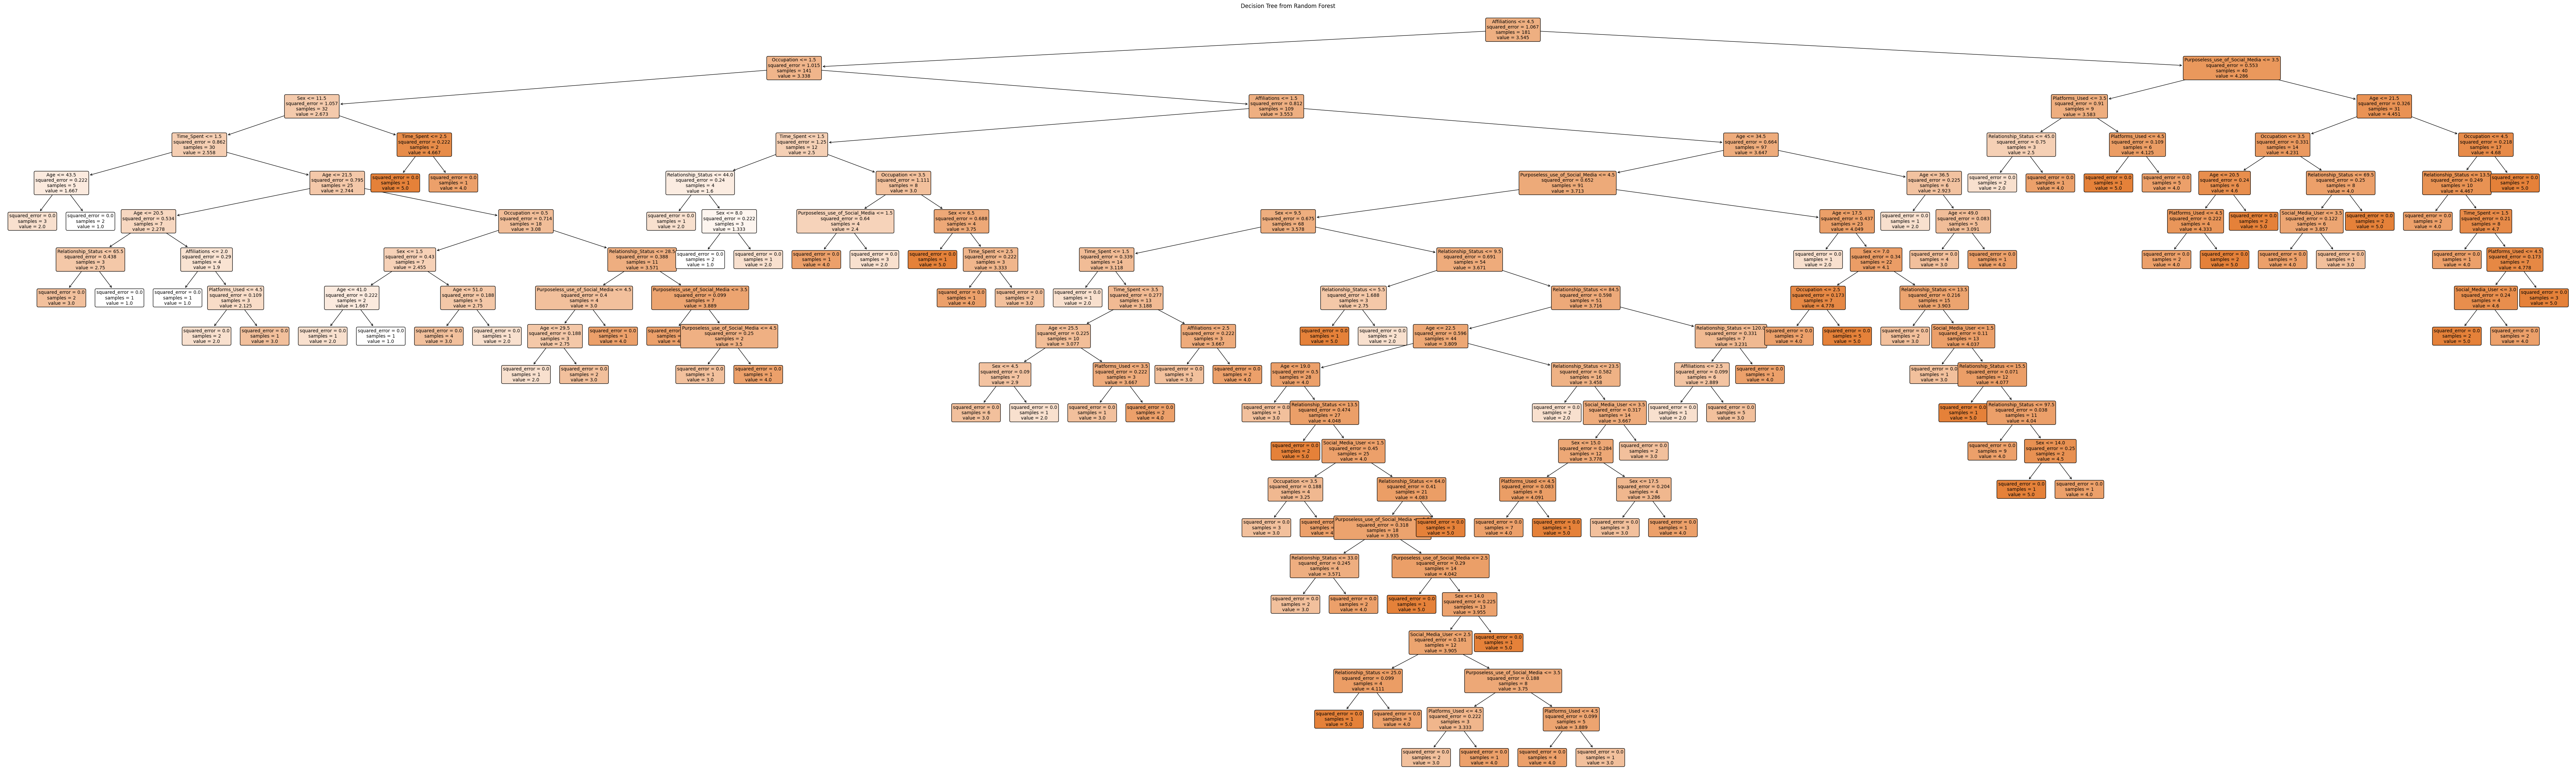

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = rf_model_2.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(100, 30))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

#Visualisasi

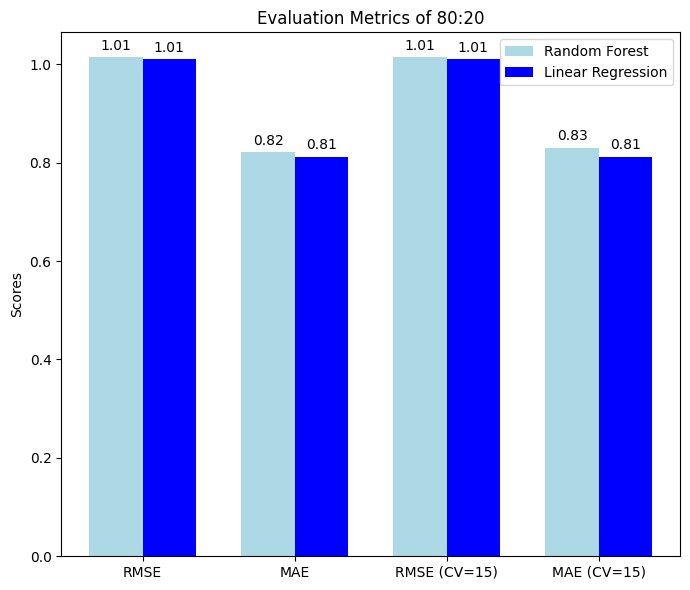

In [61]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'Linear Regression']
metrics = ['RMSE', 'MAE', 'RMSE (CV=15)', 'MAE (CV=15)']
rf_scores = [rf_rmse, rf_mae, rf_rmse_1, rf_mae_1]
lr_scores = [lr_rmse, lr_mae, lr_rmse_1, lr_mae_1]

x = np.arange(len(metrics))  # Menggunakan jumlah metrik sebagai posisi sumbu x
width = 0.35

fig, ax = plt.subplots(figsize=(7, 6))

bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='lightblue')
bars2 = ax.bar(x + width/2, lr_scores, width, label='Linear Regression', color='blue')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics of 80:20')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(bars):

    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()

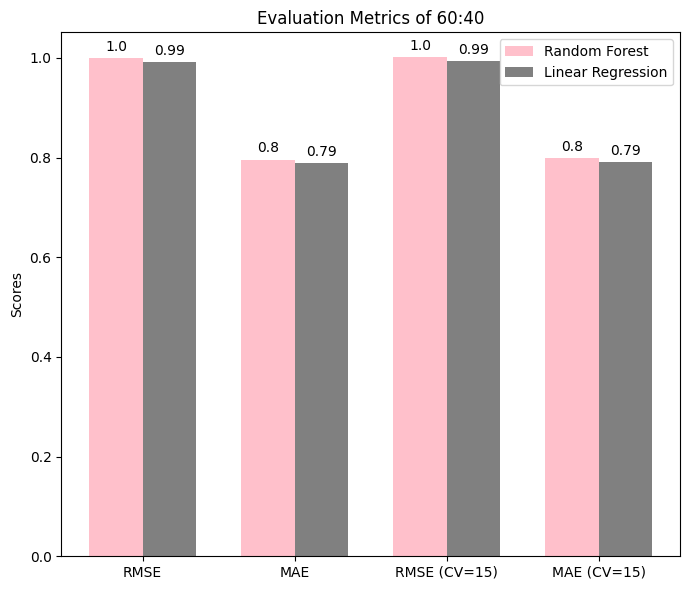

In [62]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'Linear Regression']
metrics = ['RMSE', 'MAE', 'RMSE (CV=15)', 'MAE (CV=15)']
rf_values = [rf_rmse_2, rf_mae_2, rf_rmse_3, rf_mae_3]
lr_values = [lr_rmse_2, lr_mae_2, lr_rmse_3, lr_mae_3]

x = np.arange(len(metrics))  # Menggunakan jumlah metrik sebagai posisi sumbu x
width = 0.35

fig, ax = plt.subplots(figsize=(7, 6))

bars1 = ax.bar(x - width/2, rf_values, width, label='Random Forest', color='pink')
bars2 = ax.bar(x + width/2, lr_values, width, label='Linear Regression', color='gray')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics of 60:40')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(bars):

    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


80:20

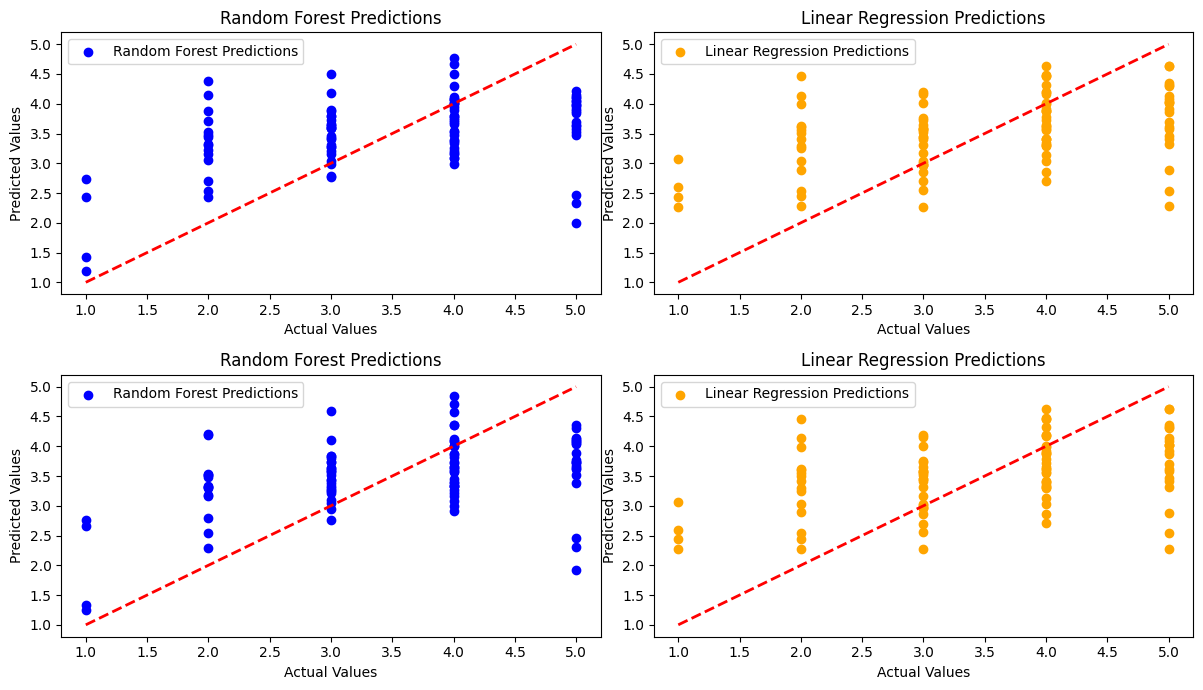

In [63]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi Random Forest
plt.figure(figsize=(12, 7))

plt.subplot(2,2,1)
plt.scatter(y_test, rf_predictions, label='Random Forest Predictions', color='blue')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], linestyle='--', color='red',linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions')
plt.legend()

# Visualisasi hasil prediksi Linear Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, lr_predictions, label='Linear Regression Predictions', color='orange')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], linestyle='--', color='red',linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(y_test, rf_predictions_1, label='Random Forest Predictions', color='blue')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], linestyle='--', color='red',linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions')
plt.legend()

# Visualisasi hasil prediksi Linear Regression
plt.subplot(2,2,4)
plt.scatter(y_test, lr_predictions_1, label='Linear Regression Predictions', color='orange')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], linestyle='--', color='red',linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()

plt.tight_layout()
plt.show()


60:40

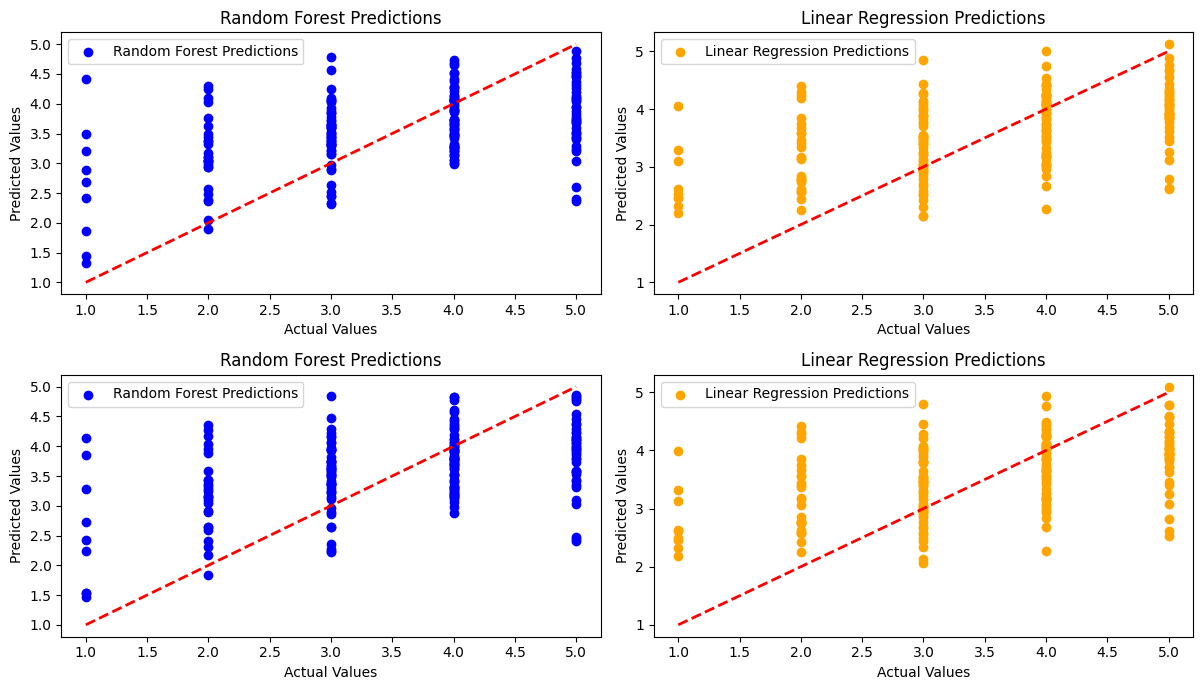

In [64]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi Random Forest
plt.figure(figsize=(12, 7))

plt.subplot(2,2,1)
plt.scatter(y_test_1, rf_predictions_2, label='Random Forest Predictions', color='blue')
plt.plot([min(y_test_1), max(y_test_1)],[min(y_test_1), max(y_test_1)], linestyle='--', color='red',linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions')
plt.legend()

# Visualisasi hasil prediksi Linear Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test_1, lr_predictions_2, label='Linear Regression Predictions', color='orange')
plt.plot([min(y_test_1), max(y_test_1)],[min(y_test_1), max(y_test_1)], linestyle='--', color='red',linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(y_test_1, rf_predictions_3, label='Random Forest Predictions', color='blue')
plt.plot([min(y_test_1), max(y_test_1)],[min(y_test_1), max(y_test_1)], linestyle='--', color='red',linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions')
plt.legend()

# Visualisasi hasil prediksi Linear Regression
plt.subplot(2,2,4)
plt.scatter(y_test_1, lr_predictions_3, label='Linear Regression Predictions', color='orange')
plt.plot([min(y_test_1), max(y_test_1)],[min(y_test_1), max(y_test_1)], linestyle='--', color='red',linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()

plt.tight_layout()
plt.show()

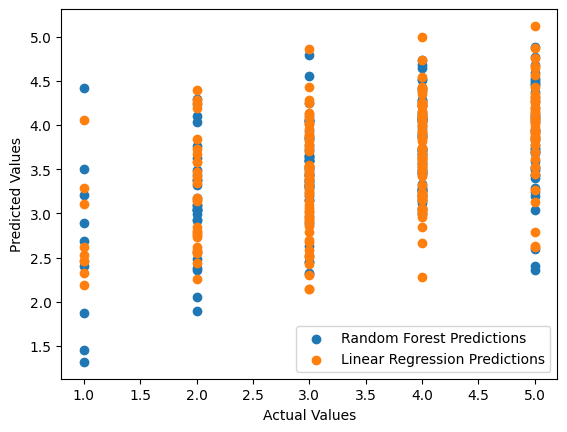

In [65]:
import matplotlib.pyplot as plt
# Visualisasi hasil prediksi
plt.scatter(y_test_1, rf_predictions_2, label='Random Forest Predictions')
plt.scatter(y_test_1, lr_predictions_2, label='Linear Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()